# Task 1.5 - Text Mining

## Importing Data and Libraries

In [1]:
#Import Libraries

from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tristansavella/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tristansavella/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tristansavella/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Import txt file

with open('20th_Century_Scrape.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

## Tokenization

In [4]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent) 

['    Key events of the 20th century - Wikipedia                            Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload file                    Search            Search                       Appearance                 Create account  Log in         Personal tools       Create account Log in      \t\tPages for logged out editors learn more    ContributionsTalk                             Contents move to sidebar hide     (Top)      1 Historic events in the 20th century     Toggle Historic events in the 20th century subsection      1.1 The world at the beginning of the century       1.1.1 "The war to end all wars": World War I (1914–1918)         1.1.2 The Russian Revolution and Communism           1.2 Between the wars       1.2.1 Economic depression         1.2.2 The rise of dictatorshi

In [5]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word) 

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1', 'Historic', 'events', 'in', 'the', '20th', 'century', 'Toggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection', '1.1', 'The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1', '``', 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914–1918', ')', '1.1.2', 'The', 'Russian', 'Revolution', 'and', 'Comm

In [6]:
# Checking frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words) 

<FreqDist with 4885 samples and 21181 outcomes>


In [7]:
# Finding 10 most common words

dist_words.most_common(10)

[('.', 1580),
 ('the', 1095),
 (',', 989),
 ('of', 604),
 ('and', 397),
 ('The', 331),
 ('to', 326),
 ('[', 302),
 (']', 302),
 ('in', 291)]

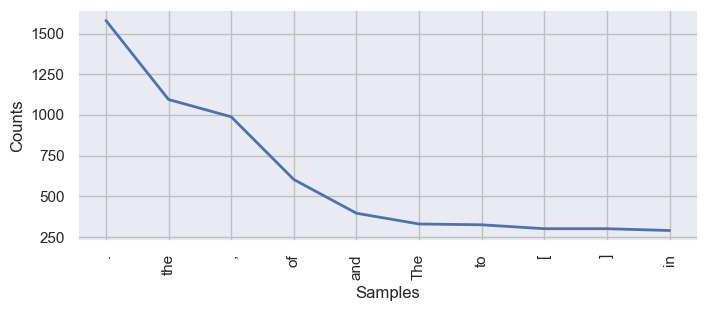

In [14]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

## Remove Stop Words

In [16]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'ourselves', 'which', 'because', 'having', 'during', 'other', 'mightn', 'wasn', 'as', 'your', 'at', 'd', 'him', 'itself', "couldn't", "haven't", 'out', 'ours', 'through', 'their', 'is', "won't", 's', 'its', 'o', 'theirs', 'these', "mightn't", 'just', 'most', 'those', 'did', 'them', 'he', 'below', 'where', 'am', 'of', 'i', 'themselves', 'against', 'each', 'once', 'had', "that'll", 'now', 'further', 'doing', "shouldn't", 'nor', 'they', "you're", 'all', 'ma', 'been', 'for', 'no', 'there', 'or', 'who', 'before', 'over', 'do', 'needn', 'does', 'here', 'are', 'were', 'being', 'some', 'my', 'himself', 'shouldn', "hasn't", 'you', 'any', 'this', 'from', 'while', 'we', 'more', 're', 'wouldn', 'off', 'so', 'a', 'don', 'it', 'has', 'should', 'her', "wasn't", "she's", 'again', 'what', 'by', 'hadn', 'if', "mustn't", 'aren', 'll', 'doesn', 'didn', 've', 'not', 'then', 'will', 'm', 'in', 'hers', 'that', 'own', 'why', 'won', 'to', 'about', 't', 'have', "weren't", "it's", 'few', 'on', 'but', "you'll", 

In [19]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [21]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'Wikipedia',
 'Jump',
 'content',
 'Main',
 'menu',
 'Main',
 'menu',
 'move',
 'sidebar',
 'hide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'usDonate',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'file',
 'Search',
 'Search',
 'Appearance',
 'Create',
 'account',
 'Log',
 'Personal',
 'tools',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'ContributionsTalk',
 'Contents',
 'move',
 'sidebar',
 'hide',
 '(',
 'Top',
 ')',
 '1',
 'Historic',
 'events',
 '20th',
 'century',
 'Toggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsection',
 '1.1',
 'The',
 'world',
 'beginning',
 'century',
 '1.1.1',
 '``',
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914–1918',
 ')',
 '1.1.2',
 'The',
 'Russian',
 'Revolution',
 'Communism',
 '1.2',
 'Between',
 'wars',
 '1.2.1',
 'Economic'

In [23]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4781 samples and 16519 outcomes>


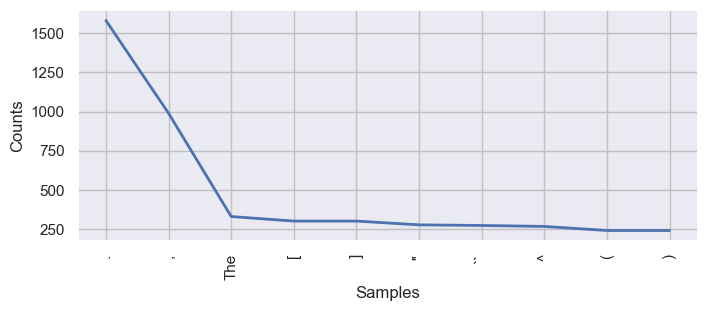

In [25]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [26]:
dist_words_filter

FreqDist({'.': 1580, ',': 989, 'The': 331, '[': 302, ']': 302, "''": 278, '``': 274, '^': 268, '(': 242, ')': 242, ...})

In [29]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [30]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Create', 'account', 'Log', 'Personal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'The', 'world', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'The', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', '

In [32]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

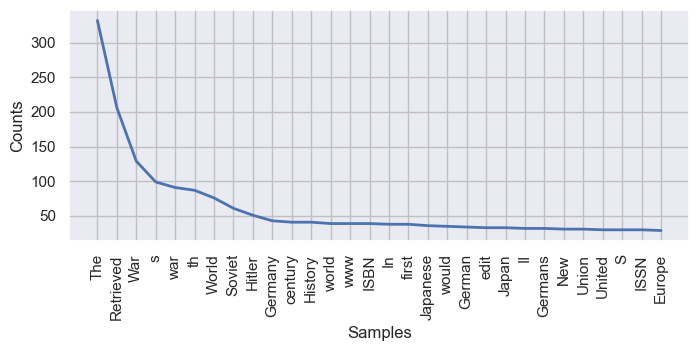

In [35]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

## Before and after removing stopwords/punctuation
##### The results of the text mining are far more useful and telling after removing stopwords and punctuation. More discernible words, such as proper pronouns and names of countries that were notorious for their involvement in various wars, now appear

## POS Tags list with textblob

In [38]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The']

In [40]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [43]:
%%time
text = TextBlob(str(filtered))

CPU times: user 9.2 ms, sys: 873 μs, total: 10.1 ms
Wall time: 9.98 ms


In [45]:
text

TextBlob("['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Create', 'account', 'Log', 'Personal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'world', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'P

In [47]:
tags_list = text.tags

In [48]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'usDonate", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'file", 'IN'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Appearance", 'NN'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS

In [49]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [50]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [51]:
df_t = df_text.groupby('Word type').count().reset_index()

In [52]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,75
2,DT,14
3,EX,12
4,FW,43


In [53]:
top20 = df_t.nlargest(20, 'Words')

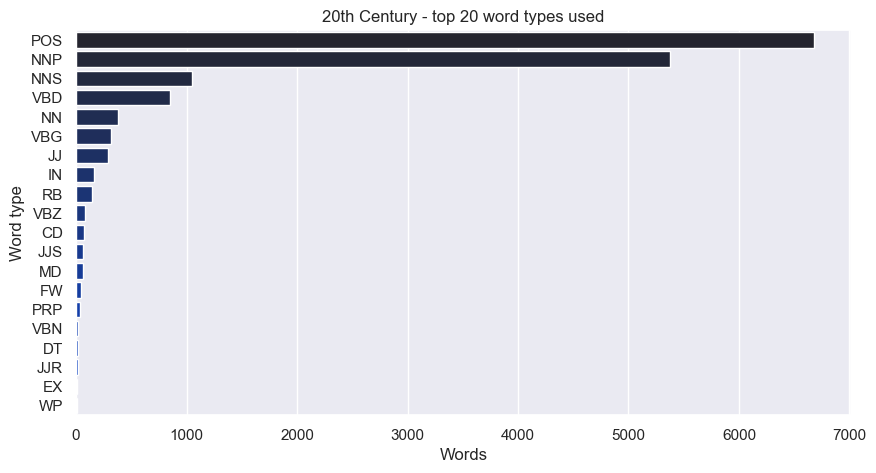

In [54]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top20).set_title("20th Century - top 20 word types used")

## Three bar plots for nouns, verbs and adjectives

In [56]:
# def word_analysis(word_type):
#     filtered = [row for row in my_list if str(word_type) in row[1]]
#     print("filtered for " + word_type)
#     df = pd.DataFrame(filtered)
#     df.columns = ["Word", "Occurences"]
#     x=df.groupby('Word').count().reset_index()
#     y=x.sort_values(by=['Occurences'], ascending=False)
#     top10=y.nlargest(10, 'Occurences')
#     plt.figure(figsize=(10, 5))
#     sns.barplot(x="Word", y="Occurences", palette="rocket", saturation=0.9, data=top10).set_title("Lord of the rings - most frequently used "+ word_type +" type word")

### Nouns

In [140]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10_n = y.nlargest(10, 'Occurences')

In [142]:
top10_n

,Word,Occurences
1258,'War,129
2580,'war,91
2499,'th,87
1305,'World,76
1105,'Soviet,61
536,'Hitler,51
535,'History,41
1495,'century,41
2613,'www,39
558,'ISBN,39


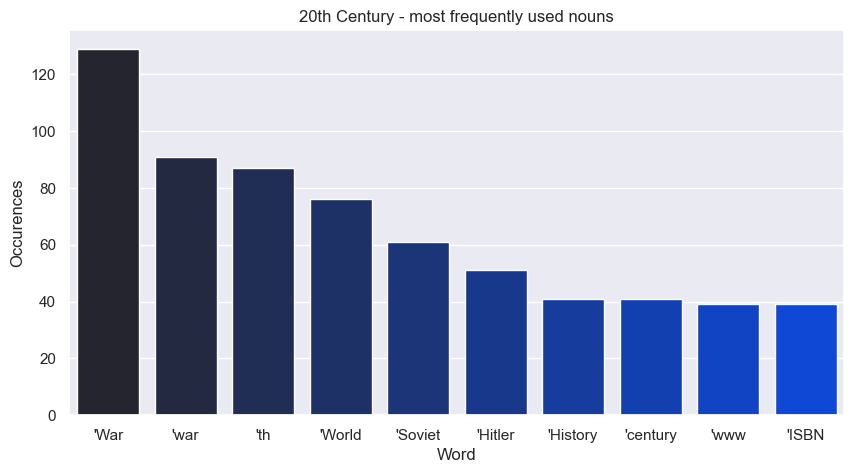

In [144]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top10_n).set_title("20th Century - most frequently used nouns")

In [148]:
# Save the figure top_nouns
plt.savefig('top_nouns.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

### Verbs

In [150]:
df_v = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df_v.columns = ["Word", "Occurences"]
x = df_v.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10_v = y.nlargest(10, 'Occurences')

In [152]:
top10_v

,Word,Occurences
26,'Retrieved,206
35,'United,30
0,'Allied,19
195,'led,15
315,'used,13
193,'launched,12
1,'Archived,10
92,'controlled,9
160,'forced,8
307,'turned,7


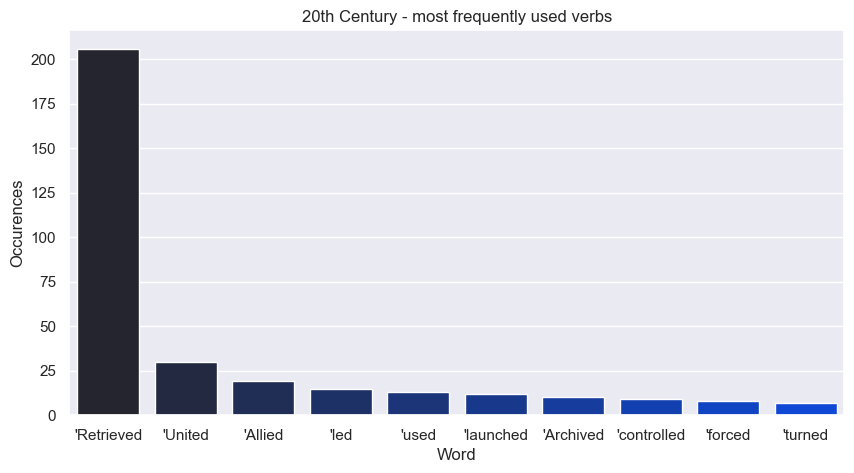

In [154]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top10_v).set_title("20th Century - most frequently used verbs")

In [156]:
# Save the figure top_verbs
plt.savefig('top_verbs.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

### Adjectives

In [159]:
df_a = df_text[df_text['Word type'] == "JJ"]
df_a.columns = ["Word", "Occurences"]
x = df_a.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top10_a = y.nlargest(10, 'Occurences')

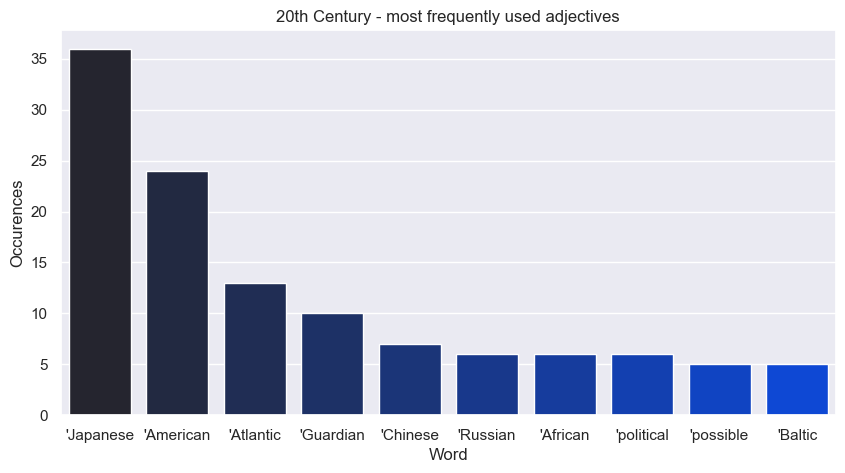

In [161]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top10_a).set_title("20th Century - most frequently used adjectives")

In [163]:
# Save the figure top_adj
plt.savefig('top_adj.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

## Frequency each country is mentioned

In [86]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Key events th century Wikipedia Jump content Main menu Main menu move sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn editCommunity portalRecent changesUpload file Search Search Appearance Create account Log Personal tools Create account Log Pages logged editors learn ContributionsTalk Contents move sidebar hide Top Historic events th century Toggle Historic events th century subsection world beginning century war end wars World War I Russian Revolution Communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External links Toggle table 

In [88]:
# Create a count for the main characters

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [90]:
all_counts

Counter({'Retrieved': 206,
         'War': 129,
         'war': 91,
         'th': 87,
         'World': 76,
         'Soviet': 61,
         'Hitler': 51,
         'Germany': 43,
         'century': 41,
         'History': 41,
         'world': 39,
         'www': 39,
         'ISBN': 39,
         'In': 38,
         'first': 38,
         'Japanese': 36,
         'would': 35,
         'German': 34,
         'edit': 33,
         'Japan': 33,
         'II': 32,
         'Germans': 32,
         'New': 31,
         'Union': 31,
         'United': 30,
         'S': 30,
         'ISSN': 30,
         'Europe': 29,
         'also': 29,
         'became': 27,
         'A': 27,
         'com': 27,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'Battle': 25,
         'end': 24,
         'history': 24,
         'This': 24,
         'American': 24,
         'weapons': 24,
         'attack': 23,
         'Main': 22,
         'Holocaust': 22,
         'new': 22,
         'St

In [92]:
countries = pd.read_csv("countries_list_20th_century_1.5.csv", index_col = 0)

In [94]:
countries.head()

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola


In [96]:
countries['country_name'] = countries['country_name'].str.strip()

In [98]:
countries.head()

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola


In [100]:
# Replace names with aliases

countries['country_name'] = countries['country_name'].replace('United States','USA')
countries['country_name'] = countries['country_name'].replace('United States of America','USA')
countries['country_name'] = countries['country_name'].replace('America','USA')
countries['country_name'] = countries['country_name'].replace('United Kingdom','UK')
countries['country_name'] = countries['country_name'].replace('Great Britain','UK')
countries['country_name'] = countries['country_name'].replace('Britain','UK')

In [102]:
countries

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola
...,...
205,Sahrawi Arab Democratic Republic
206,Somaliland
207,South Ossetia
208,Taiwan


In [104]:
countries['country_alias'] = countries['country_name'].apply(lambda x: x.rsplit(' ', 1)[-1])

In [106]:
countries

,country_name,country_alias
1,Afghanistan,Afghanistan
2,Albania,Albania
3,Algeria,Algeria
4,Andorra,Andorra
5,Angola,Angola
...,...,...
205,Sahrawi Arab Democratic Republic,Republic
206,Somaliland,Somaliland
207,South Ossetia,Ossetia
208,Taiwan,Taiwan


In [108]:
countries_list = countries['country_alias'].to_list()

In [110]:
dict_of_counts = {d : all_counts[d] for d in countries_list}

In [112]:
dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 2,
 'Faso': 0,
 'Burundi': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Verde': 1,
 'Republic': 4,
 'Chad': 0,
 'Chile': 0,
 'of': 1,
 'Colombia': 0,
 'Comoros': 0,
 'the': 3,
 'Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Timor': 1,
 'Ecuador': 0,
 'Egypt': 2,
 'Salvador': 0,
 'Guinea': 4,
 'Eritrea': 0,
 'Estonia': 2,
 'Eswatini': 0,
 'Ethiopia': 0,
 'Fiji': 0,
 'Finland': 4,
 'France': 16,
 'Gabon': 0,
 'Georgia': 0,
 'Germany': 43,
 'Ghana': 1,
 'Greece': 4,
 'Grenada': 0,
 'Guatemala': 0,
 'Bissau': 1,
 'Guyana': 0,
 'Haiti': 0,
 '

In [114]:
# Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}  
df = pd.DataFrame(dct)

In [116]:
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Barbuda,Argentina,Armenia,Australia,Austria,...,Zambia,Zimbabwe,Abkhazia,Artsakh,Kosovo,Niue,Somaliland,Ossetia,Taiwan,Transnistria
0,1,2,1,0,1,0,0,0,2,5,...,0,0,0,0,0,0,0,0,0,0


In [118]:
df = df.transpose().reset_index()

In [120]:
df.dtypes

index    object
0         int64
dtype: object

In [122]:
df

,index,0
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
189,Niue,0
190,Somaliland,0
191,Ossetia,0
192,Taiwan,0


In [124]:
df.rename(columns = {"index":"country_name", 0:"Times mentioned"}, inplace = True)

In [126]:
df

,country_name,Times mentioned
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
189,Niue,0
190,Somaliland,0
191,Ossetia,0
192,Taiwan,0


In [127]:
df.shape

(194, 2)

In [130]:
# Set the figure size
plt.figure(figsize=(100, 300))

# Create a dark palette with 27 colors
palette = sns.dark_palette("#79C", 27)

# Plotting
with sns.color_palette(palette):
    ax = sns.barplot(
        x="Times mentioned", 
        y="country_name",
        saturation=0.9, 
        data=df.sort_values("Times mentioned", ascending=False)
    )
    ax.set_title("20th Century - most frequently mentioned countries", fontsize=100)
    ax.set_xlabel("Times mentioned", fontsize=50)
    ax.set_ylabel("Country Name", fontsize=50)

    # Adjust tick label size
    ax.tick_params(axis='x', labelsize=50)
    ax.tick_params(axis='y', labelsize=50)

### Thoughts on the Bar Chart

There is still further cleaning to be done. There are some unusable entries in the countries list, such as "States", "Islands" and "North", which could refer to any number of countries or perhaps aren't referring countries at all. I also noticed that countries with two words in the name do not appear as much as I would expect from this graph: countries such as United States and United Kingdom. 

## Save Final Bar Chart

In [135]:
# country mentions
plt.savefig('20th_century_countries_mentions.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>